#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('banking-statment-dataset.csv') # loading dataset

In [3]:
df

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance
0,01-08-2018,Wednesday,Debit,Shopping,2500.00,0.0,174656.42
1,01-08-2018,Wednesday,Debit,Shopping,324.00,0.0,174332.42
2,02-08-2018,Thursday,NaN,NaN,0.00,0.0,174332.42
3,03-08-2018,Friday,Debit,Shopping,404.38,0.0,173928.04
4,04-08-2018,Saturday,Debit,Shopping,100.00,0.0,173828.04
...,...,...,...,...,...,...,...
102,29-09-2018,Saturday,Debit,Shopping,202.19,0.0,456539.63
103,30-09-2018,Sunday,Debit,Shopping,1185.00,0.0,455354.63
104,30-09-2018,Sunday,Debit,ATM,10000.00,0.0,445354.63
105,30-09-2018,Sunday,Debit,Medical,1155.75,0.0,444198.88


## Data Cleaning and Preprocessing

#### Checking null values

In [4]:
df.isnull().sum()

Date                0
Day                 0
Type               21
Category           21
Debit Amount        0
Credit Amount       0
Closing Balance     0
dtype: int64

#### Replacing NaN values

In [5]:
df['Type'].fillna('Unknown',inplace=True) 

In [6]:
df['Category'].fillna('Other',inplace=True)

In [7]:
df.head()

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance
0,01-08-2018,Wednesday,Debit,Shopping,2500.00,0.0,174656.42
1,01-08-2018,Wednesday,Debit,Shopping,324.00,0.0,174332.42
2,02-08-2018,Thursday,Unknown,Other,0.00,0.0,174332.42
3,03-08-2018,Friday,Debit,Shopping,404.38,0.0,173928.04
4,04-08-2018,Saturday,Debit,Shopping,100.00,0.0,173828.04


#### Changing Data type of Date column

In [8]:
df.dtypes

Date                object
Day                 object
Type                object
Category            object
Debit Amount       float64
Credit Amount      float64
Closing Balance    float64
dtype: object

In [9]:
from datetime import datetime

In [10]:
current_datetime = datetime.now()

In [11]:
df['Date'] = current_datetime.strftime('%Y-%m-%d') #converting to year-month-day format

In [12]:
df['Date']  = pd.to_datetime(df['Date']) # converting to datetime format

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             107 non-null    datetime64[ns]
 1   Day              107 non-null    object        
 2   Type             107 non-null    object        
 3   Category         107 non-null    object        
 4   Debit Amount     107 non-null    float64       
 5   Credit Amount    107 non-null    float64       
 6   Closing Balance  107 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 6.0+ KB


## Exploratory Data Analysis (EDA)

#### Calculating basic statistics to understand distribution of your data

In [14]:
df['Debit Amount'].describe()

count      107.000000
mean      2204.134019
std       4051.645677
min          0.000000
25%          0.000000
50%        410.000000
75%       1961.000000
max      20000.000000
Name: Debit Amount, dtype: float64

In [15]:
df['Credit Amount'].describe()

count       107.000000
mean       4715.493458
std       34048.072860
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      250254.000000
Name: Credit Amount, dtype: float64

In [16]:
df['Closing Balance'].describe()

count       107.000000
mean     188526.835701
std      112446.990462
min       29351.590000
25%      115840.460000
50%      172098.040000
75%      231862.810000
max      462101.010000
Name: Closing Balance, dtype: float64

## HANDLING OUTLIERS

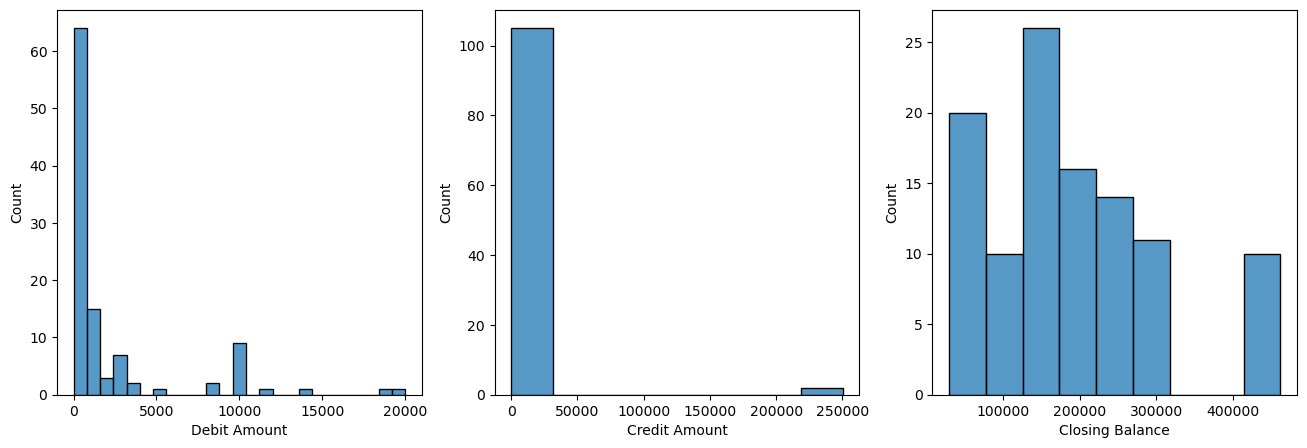

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(df['Debit Amount'])

plt.subplot(1,3,2)
sns.histplot(df['Credit Amount'])

plt.subplot(1,3,3)
sns.histplot(df['Closing Balance'])

plt.show()

In [18]:
#Debit Amount percentile
percentile25 = df['Debit Amount'].quantile(0.25) # lower bound
percentile75 = df['Debit Amount'].quantile(0.75) # upper bound
IQR = percentile75 - percentile25

In [19]:
IQR

1961.0

In [20]:
upper_limit = percentile75+1.5*IQR
lower_limit = percentile25-1.5*IQR

In [21]:
print("Upper Limit", upper_limit)
print("Lower Limit", lower_limit)

Upper Limit 4902.5
Lower Limit -2941.5


In [22]:
df[df['Debit Amount']>upper_limit]

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance
8,2024-07-27,Saturday,Debit,ATM,10000.0,0.0,162098.04
30,2024-07-27,Wednesday,Debit,ATM,10000.0,0.0,137250.98
31,2024-07-27,Thursday,Debit,Rent,14000.0,0.0,123250.98
34,2024-07-27,Saturday,Debit,Shopping,8400.0,0.0,111640.46
35,2024-07-27,Saturday,Debit,Shopping,8296.0,0.0,103344.46
36,2024-07-27,Saturday,Debit,Shopping,11610.0,0.0,91734.46
40,2024-07-27,Wednesday,Debit,ATM,10000.0,0.0,81343.46
41,2024-07-27,Thursday,Debit,Shopping,18777.0,0.0,62566.46
51,2024-07-27,Saturday,Debit,ATM,10000.0,0.0,48441.46
52,2024-07-27,Saturday,Debit,ATM,10000.0,0.0,38441.46


In [23]:
df[df['Debit Amount']<lower_limit]

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance


## capping

In [24]:
new_df_cap = df.copy()

new_df_cap['Debit Amount'] = np.where(
     new_df_cap['Debit Amount'] > upper_limit,
    upper_limit,
    np.where(
         new_df_cap['Debit Amount']<lower_limit,
        lower_limit,
        new_df_cap['Debit Amount']
    )
 )

In [25]:
new_df_cap.shape

(107, 7)

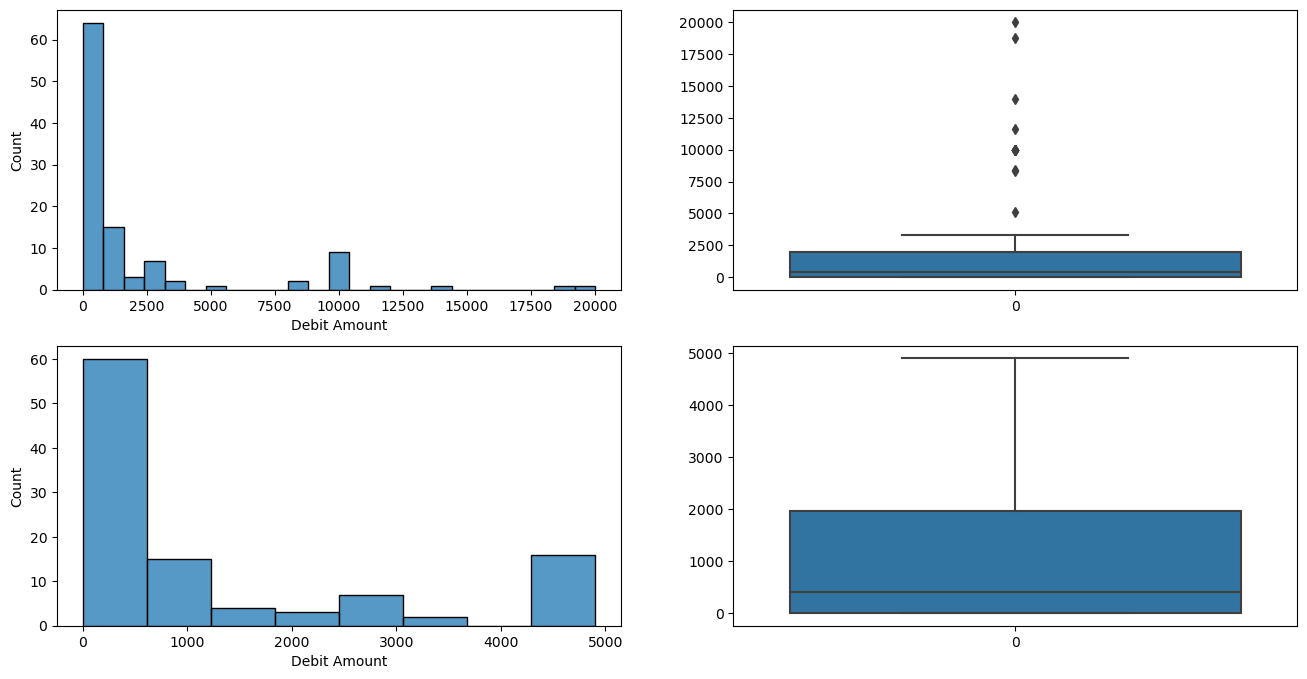

In [26]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Debit Amount'])

plt.subplot(2,2,2)
sns.boxplot(df['Debit Amount'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['Debit Amount'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Debit Amount'])

plt.show()

In [27]:
# calculating the zscore
df['creditAmount_zscore'] = (df['Credit Amount']-df['Credit Amount'].mean())/df['Credit Amount'].std()

In [28]:
df.head()

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance,creditAmount_zscore
0,2024-07-27,Wednesday,Debit,Shopping,2500.00,0.0,174656.42,-0.138495
1,2024-07-27,Wednesday,Debit,Shopping,324.00,0.0,174332.42,-0.138495
2,2024-07-27,Thursday,Unknown,Other,0.00,0.0,174332.42,-0.138495
3,2024-07-27,Friday,Debit,Shopping,404.38,0.0,173928.04,-0.138495
4,2024-07-27,Saturday,Debit,Shopping,100.00,0.0,173828.04,-0.138495


In [29]:
# finding the boundary values
print('Highest allowed',df['Credit Amount'].mean() + 3*df['Credit Amount'].std())
print('Lowest allowed',df['Credit Amount'].mean() - 3*df['Credit Amount'].std())

Highest allowed 106859.71203880222
Lowest allowed -97428.72512291436


In [30]:
# finding the outliers
df[(df['Credit Amount']>106859.71) | (df['Credit Amount'] < -97428.72)]

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance,creditAmount_zscore
61,2024-07-27,Friday,Credit,Salary,0.0,250254.0,279605.59,7.211524
97,2024-07-27,Friday,Credit,Salary,0.0,250254.0,462101.01,7.211524


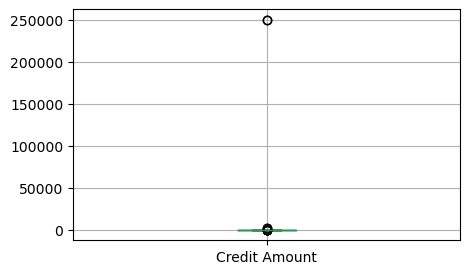

In [31]:
df.boxplot(column=['Credit Amount'], figsize=(5, 3)) #boxplot for credit amount
plt.show()

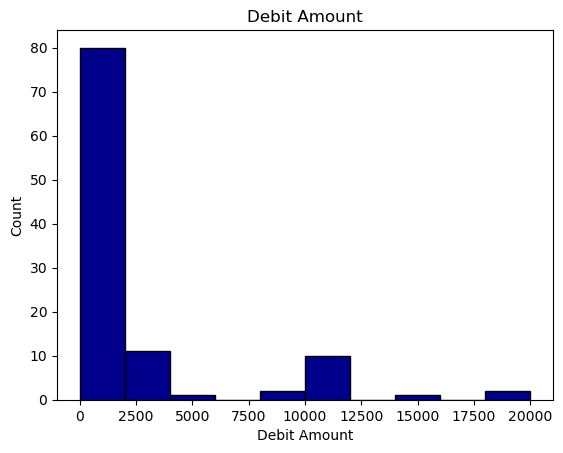

In [32]:
plt.hist(df['Debit Amount'],bins=10,color="darkblue",edgecolor='black') # plotting histogram for debit amount
plt.title('Debit Amount')
plt.xlabel('Debit Amount')
plt.ylabel('Count')
plt.show()

In [33]:
df['DebitAmount_zscore']=(df['Debit Amount']-df['Debit Amount'].mean())/df['Debit Amount'].std()

In [34]:
df.head()

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance,creditAmount_zscore,DebitAmount_zscore
0,2024-07-27,Wednesday,Debit,Shopping,2500.00,0.0,174656.42,-0.138495,0.073024
1,2024-07-27,Wednesday,Debit,Shopping,324.00,0.0,174332.42,-0.138495,-0.464042
2,2024-07-27,Thursday,Unknown,Other,0.00,0.0,174332.42,-0.138495,-0.544010
3,2024-07-27,Friday,Debit,Shopping,404.38,0.0,173928.04,-0.138495,-0.444203
4,2024-07-27,Saturday,Debit,Shopping,100.00,0.0,173828.04,-0.138495,-0.519328


In [35]:
df[df['DebitAmount_zscore']<-3]

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance,creditAmount_zscore,DebitAmount_zscore


In [36]:
df[(df['DebitAmount_zscore']>3) | (df['DebitAmount_zscore']<-3)]

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance,creditAmount_zscore,DebitAmount_zscore
41,2024-07-27,Thursday,Debit,Shopping,18777.0,0.0,62566.46,-0.138495,4.090404
76,2024-07-27,Monday,Debit,Rent,20000.0,0.0,232065.00,-0.138495,4.392256


In [37]:
Q1 = df['Debit Amount'].quantile(0.25) # lower bound
Q3 = df['Debit Amount'].quantile(0.75) # upper bound
IQR = Q3 - Q1

In [38]:
df['Credit Amount'].skew()

7.208433096011867

In [39]:
df['Debit Amount'].skew()

2.434506437737525

In [40]:
df['Closing Balance'].skew()

0.9000569539502884

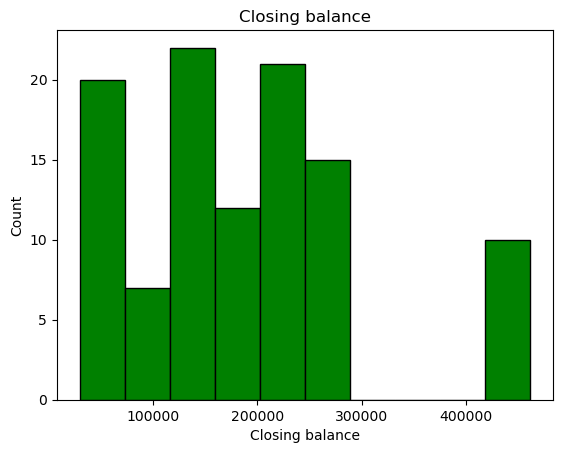

In [41]:
plt.hist(df['Closing Balance'],bins=10,color="green",edgecolor='black') #histogram for closing balance
plt.title('Closing balance')
plt.xlabel('Closing balance')
plt.ylabel('Count')
plt.show()

In [42]:
Q1 = df['Closing Balance'].quantile(0.25) # lower bound
Q3 = df['Closing Balance'].quantile(0.75) # upper bound
IQR = Q3 - Q1

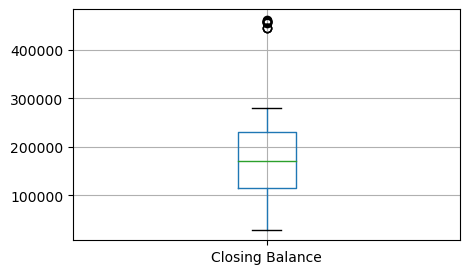

In [43]:
df.boxplot(column=['Closing Balance'], figsize=(5, 3)) # box plot for closing balance
plt.show()

#### Frequency of Type and category analysing

In [44]:
df['Type'].value_counts() # returns the unique values count of Type

Type
Debit      76
Unknown    21
Credit     10
Name: count, dtype: int64

In [45]:
df['Category'].value_counts() # returns the unique values count of category

Category
Shopping         46
Other            21
ATM               9
Interest          8
Entertainment     7
Medical           5
Travel            4
Restaurant        3
Rent              2
Salary            2
Name: count, dtype: int64

## Category-wise Analysis

In [46]:
df.head()

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance,creditAmount_zscore,DebitAmount_zscore
0,2024-07-27,Wednesday,Debit,Shopping,2500.00,0.0,174656.42,-0.138495,0.073024
1,2024-07-27,Wednesday,Debit,Shopping,324.00,0.0,174332.42,-0.138495,-0.464042
2,2024-07-27,Thursday,Unknown,Other,0.00,0.0,174332.42,-0.138495,-0.544010
3,2024-07-27,Friday,Debit,Shopping,404.38,0.0,173928.04,-0.138495,-0.444203
4,2024-07-27,Saturday,Debit,Shopping,100.00,0.0,173828.04,-0.138495,-0.519328


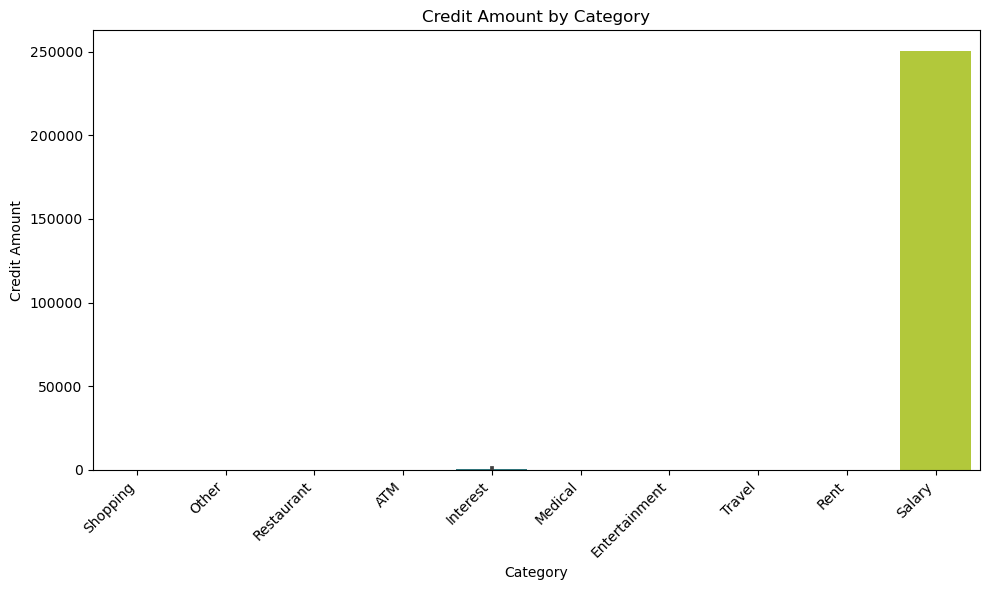

In [47]:
# bar plot for category on x-axis and credit amount on y-axis

plt.figure(figsize=(10, 6))
sns.barplot(x=df['Category'], y=df['Credit Amount'], palette='viridis') 
plt.title('Credit Amount by Category')
plt.xlabel('Category')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

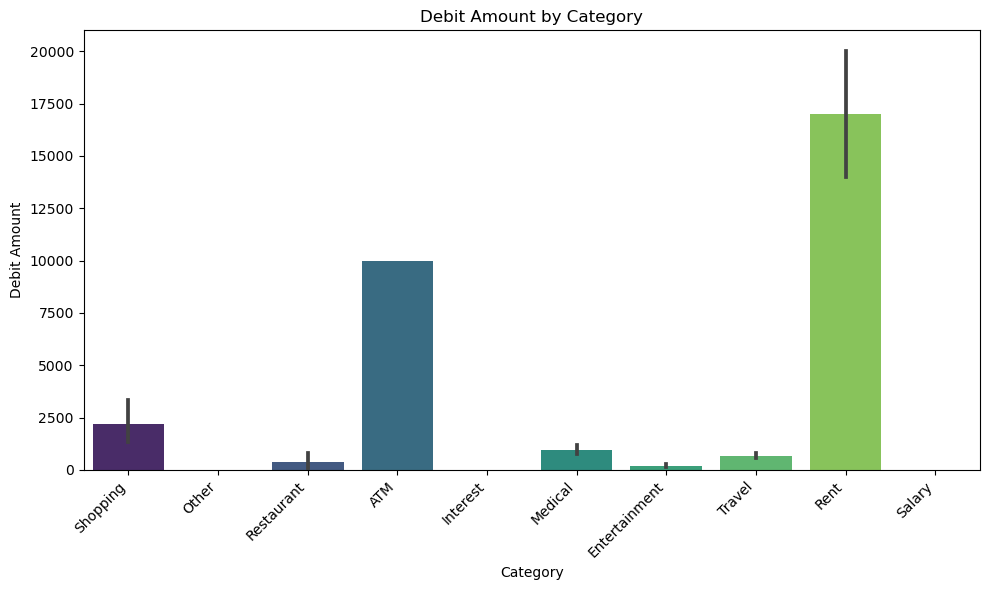

In [48]:
# bar plot for category on x-axis and debit amount on y-axis

plt.figure(figsize=(10, 6))
sns.barplot(x=df['Category'], y=df['Debit Amount'], palette='viridis')
plt.title('Debit Amount by Category')
plt.xlabel('Category')
plt.ylabel('Debit Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

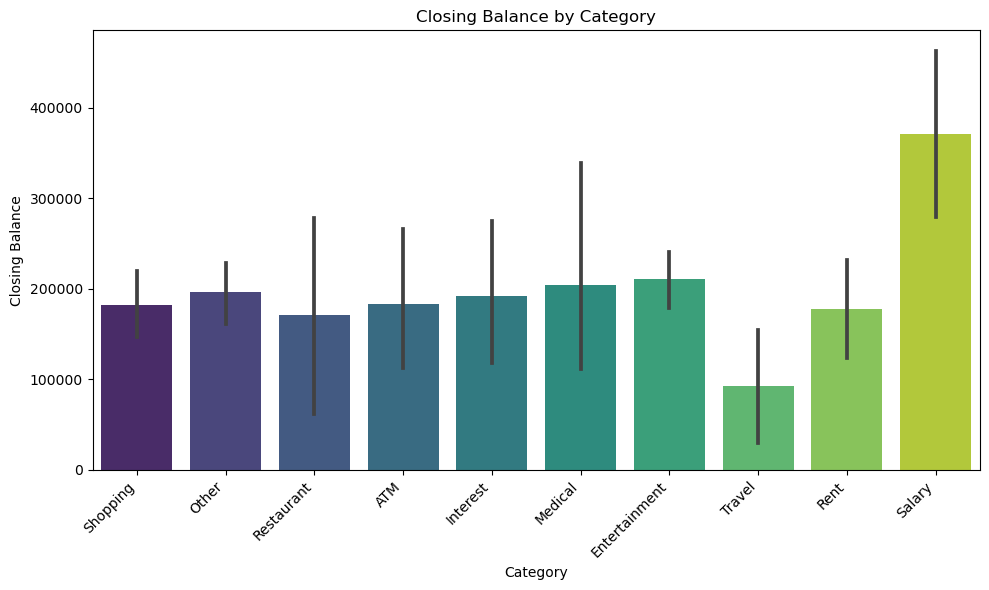

In [49]:
# bar plot for category on x-axis and closing balance on y-axis

plt.figure(figsize=(10, 6))
sns.barplot(x=df['Category'], y=df['Closing Balance'], palette='viridis')
plt.title('Closing Balance by Category')
plt.xlabel('Category')
plt.ylabel('Closing Balance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Top 3 spending categories

In [50]:
category_spending = df.groupby('Category')['Debit Amount'].sum().sort_values(ascending=False)

In [51]:
top_categories = category_spending.head(3) # top 3 categories

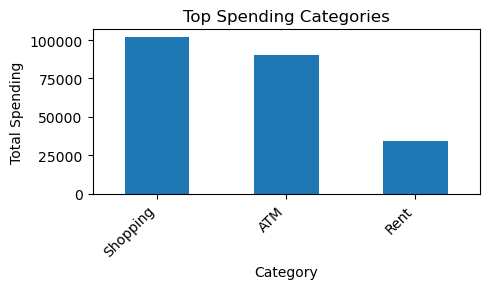

In [52]:
# bar graph for top 3 spending categories

plt.figure(figsize=(5, 3))
top_categories.plot(kind='bar')
plt.title('Top Spending Categories')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Financial Health Assessment

In [53]:
df['Month'] = df['Date'].dt.to_period('M') #extracting month from date column

In [54]:
df.head()

,Date,Day,Type,Category,Debit Amount,Credit Amount,Closing Balance,creditAmount_zscore,DebitAmount_zscore,Month
0,2024-07-27,Wednesday,Debit,Shopping,2500.00,0.0,174656.42,-0.138495,0.073024,2024-07
1,2024-07-27,Wednesday,Debit,Shopping,324.00,0.0,174332.42,-0.138495,-0.464042,2024-07
2,2024-07-27,Thursday,Unknown,Other,0.00,0.0,174332.42,-0.138495,-0.544010,2024-07
3,2024-07-27,Friday,Debit,Shopping,404.38,0.0,173928.04,-0.138495,-0.444203,2024-07
4,2024-07-27,Saturday,Debit,Shopping,100.00,0.0,173828.04,-0.138495,-0.519328,2024-07


In [55]:
# getting net income from subtracting credit amount and debit amount
df['Net Income'] = df['Credit Amount'] - df['Debit Amount']

In [56]:
# calculates the total spending per month by summing up the Debit Amount
total_spending = df.groupby('Month')['Debit Amount'].sum()

In [57]:
# calculates the total spending per month by summing up the credit Amount
total_income = df.groupby('Month')['Credit Amount'].sum()

In [58]:
# calculates the savings rate as a percentage
savings_rate = ((total_income - total_spending) / total_income) * 100 

In [59]:
financial_health = pd.DataFrame({
    'Total Income': total_income,
    'Total Spending': total_spending,
    'Net Income': total_income - total_spending,
    'Savings Rate (%)': savings_rate
})

# Display the financial health assessment
print(financial_health)

         Total Income  Total Spending  Net Income  Savings Rate (%)
Month                                                              
2024-07      504557.8       235842.34   268715.46         53.257617


## Forescasting 

In [60]:
from statsmodels.tsa.arima.model import ARIMA

In [61]:
# sets the 'Date' column as the index
data = df.set_index('Date')['Debit Amount']

In [62]:
# create a model ARIMA and fits the model

model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
# Forecast of the next 30 steps
forecast = model_fit.forecast(steps=30)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


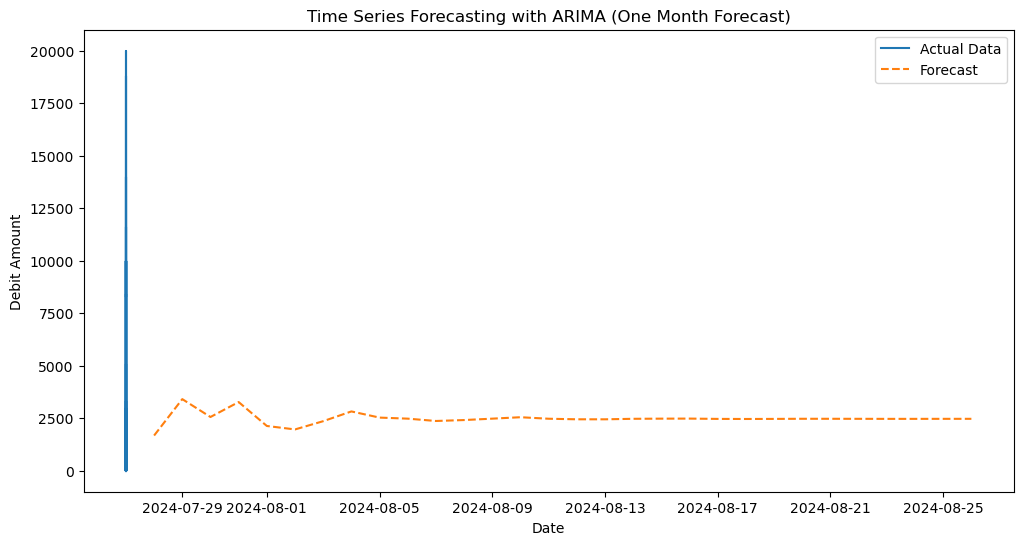

In [64]:
# plotting forecasting with ARIMA of one month

plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Actual Data')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', linestyle='--')
plt.title('Time Series Forecasting with ARIMA (One Month Forecast)')
plt.xlabel('Date')
plt.ylabel('Debit Amount')
plt.legend()
plt.show()

## Predictive Modeling

In [65]:
# importing machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [66]:
X = df[['Type','Day','Credit Amount','Debit Amount','Closing Balance']] # creating X inpout 
y = df['Category'] # creating y target variable

In [67]:
# label encoder to type and day
label_encoders = {}
for feature in ['Type', 'Day']:
    label_encoders[feature] = LabelEncoder()
    X[feature] = label_encoders[feature].fit_transform(X[feature])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11408\407770725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoders[feature].fit_transform(X[feature])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11408\407770725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoders[feature].fit_transform(X[feature])


In [68]:
# splits the data in training and testing with test size 20% and random staet to 42 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# fitting the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) # printing accuracy

Accuracy: 0.7727272727272727
